# Outlier and Anomaly Detection

**Outliers** are data points that deviate significantly from the majority of the data in a dataset. They are unusual values that are not in line with the general distribution of the data. Outliers can be the result of variability in the measurement, experimental errors or data entry errors. They could also represent a novel or rare event.

**Anomalies** are patterns in data that do not conform to a well-defined notion of normal behavior. Anomalies are similar to outliers but are often considered in the context of temporal or complex data. Anomaly detection is particularly relevant in sequential data or in situations where the data is generated by complex systems, such as cyber-security, fraud detection, or health monitoring.

Detecting outliers and anomalies is important for several reasons:

1. **Data Cleaning**: Outliers can arise due to errors in data collection or entry, and identifying these can help clean the data and improve the quality of the dataset.

2. **Robustness**: Machine learning models can be sensitive to outliers. Detecting and handling outliers can make models more robust and improve their generalization.

3. **Insights**: Outliers and anomalies can sometimes be the most interesting part of the data. For example, in fraud detection, the fraudulent activities are the anomalies that we want to detect.

4. **Safety**: In critical systems, such as healthcare monitoring or aviation, anomaly detection can provide early warnings about potentially dangerous conditions.

Several popular methods for outlier and anomaly detection include Z-Score, Local Outlier Factor (LOF), Mahalanobis Distance and One-Class SVM.

## Z-Score Method

The Z-Score, also known as the standard score, indicates how many standard deviations an element is from the mean. A Z-Score can be calculated for each data point to determine if it's an outlier.

### Steps to Calculate Z-Score:

1. Calculate the mean (μ) and standard deviation (σ) of the feature / variable.
2. For each data point (x), calculate the Z-Score
3. Determine a threshold Z-Score (e.g., 3 or -3). Data points with a Z-Score beyond this threshold are considered outliers.

### Z-Score Formula

$$ Z = \frac{(X - \mu)}{\sigma} $$

where:
- $X$ is the data point.
- $\mu$ is the mean of the dataset.
- $\sigma$ is the standard deviation of the dataset.

In [1]:
import pandas as pd
import numpy as np

In [2]:
# Sample data
data = np.array([10, 12, 12, 13, 12, 11, 14, 13, 15, 10, 10, 100, 12, 14, 14])

In [3]:
# Calculate mean and standard deviation
mean = np.mean(data)
std_dev = np.std(data)

In [4]:
# Calculate Z-Scores
z_scores = (data - mean) / std_dev

In [5]:
# Set a threshold and detect outliers
threshold = 3
outliers = np.where(np.abs(z_scores) > threshold)

print(f"Outlier indices: {outliers[0]}")

Outlier indices: [11]


## Local Outlier Factor (LOF)

LOF is an algorithm that detects outliers by measuring the local deviation of a given data point concerning its neighbors. It considers the density of a data point's neighborhood and compares it to the density of its neighbors' neighborhoods.

![lof](../assets/lof.png)

### Steps to Use LOF:

1. Choose the number of neighbors (k).
2. Calculate the reachability distance and local reachability density for each point.
3. Calculate the LOF score for each point. A score significantly larger than 1 indicates an outlier.

### LOF Formula

$$ LOF_k(A) = \frac{\sum_{B \in N_k(A)} \frac{lrd(B)}{lrd(A)}}{|N_k(A)|} $$

where:
- $N_k(A)$ is the set of $k$ nearest neighbors of $A$.
- $lrd$ is the local reachability density.

In [6]:
from sklearn.neighbors import LocalOutlierFactor

In [7]:
# Sample data
X = [[10, 10], [12, 12], [11, 11], [14, 14], [100, 100], [14, 14]]

In [8]:
clf = LocalOutlierFactor(n_neighbors=2)
outlier_labels = clf.fit_predict(X)

In [9]:
# -1 indicates an outlier
print(f"Outlier labels: {outlier_labels}")

Outlier labels: [ 1  1  1  1 -1  1]


## Mahalanobis Distance

Mahalanobis Distance is a multivariate measure of the distance between a point and a distribution. It's an effective way to detect outliers, especially when dealing with multidimensional data.

### Steps to Calculate Mahalanobis Distance:

1. Calculate the covariance matrix of the dataset.
2. Calculate the inverse of the covariance matrix.
3. For each data point (x), calculate its Mahalanobis Distance using the formula: D² = (x - μ)ᵀ * S⁻¹ * (x - μ), where S⁻¹ is the inverse covariance matrix.

### Mahalanobis Distance Formula

$$ D^2 = (x - \mu)^T S^{-1} (x - \mu) $$

where:
- $x$ is the data point.
- $\mu$ is the mean of the dataset.
- $S$ is the covariance matrix of the dataset.
- $S^{-1}$ is the inverse of the covariance matrix.

In [10]:
from scipy.stats import chi2

In [11]:
X = np.array([[10, 10], [12, 12], [11, 11], [14, 14], [100, 100], [14, 14]])

In [12]:
# Calculate mean and covariance matrix
mean = np.mean(X, axis=0)
cov_matrix = np.cov(X.T)
inv_cov_matrix = np.linalg.inv(cov_matrix)

In [13]:
# Calculate Mahalanobis Distance for each data point
mahalanobis_distances = np.array([np.dot(np.dot((x - mean), inv_cov_matrix), (x - mean).T) for x in X])

In [14]:
# Compare with a critical value from the chi-squared distribution
critical_value = chi2.ppf((1-0.1), df=2)  # df is the number of dimensions
outliers = np.where(mahalanobis_distances > critical_value)

In [15]:
print(f"Outlier indices: {outliers[0]}")

Outlier indices: [4]


## One-Class SVM

One-Class SVM is an extension of the SVM algorithm that has been adapted for anomaly detection. The goal of One-Class SVM is to find a function that captures the region where the majority of the data points reside. Data points that do not fit within this region are considered anomalies.

## How One-Class SVM Works

One-Class SVM works by mapping the input data points into a high-dimensional feature space using a kernel function. It then tries to separate the data from the origin with maximum margin. This results in a decision boundary around the normal data points. Points that fall outside this boundary are deemed anomalies.

## Parameters of One-Class SVM

- `nu`: An upper bound on the fraction of training errors and a lower bound of the fraction of support vectors. It must be between 0 and 1. Essentially, it corresponds to the proportion of outliers you expect in your data.
- `kernel`: Specifies the kernel type to be used in the algorithm. It can be `linear`, `poly`, `rbf`, `sigmoid`, `precomputed`, or a callable.
- `gamma`: Kernel coefficient for `rbf`, `poly`, and `sigmoid`. It controls the influence of individual training samples - this affects the smoothness of the model. A low value of gamma will give a more flexible decision boundary.

In [16]:
import matplotlib.pyplot as plt
from sklearn.svm import OneClassSVM

In [17]:
np.random.seed(42)
X_normal = np.random.randn(100, 2)
X_outliers = np.random.uniform(low=-4, high=4, size=(20, 2))
X = np.vstack([X_normal, X_outliers])

In [18]:
clf = OneClassSVM(nu=0.1, kernel="rbf", gamma=0.1)
clf.fit(X_normal)

OneClassSVM(gamma=0.1, nu=0.1)

In [19]:
y_pred = clf.predict(X)

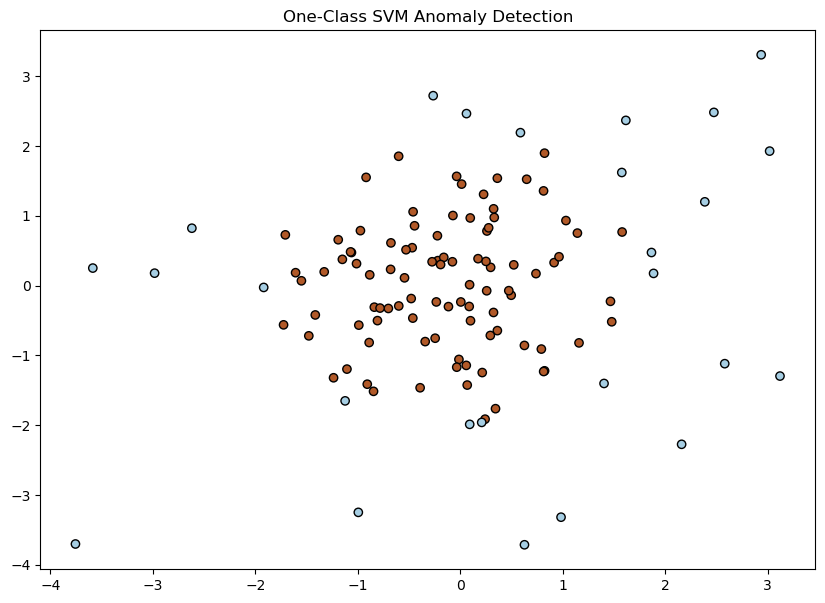

In [20]:
plt.figure(figsize=(10, 7))
plt.title("One-Class SVM Anomaly Detection")
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap=plt.cm.Paired, edgecolors='k')

In [21]:
xx, yy = np.meshgrid(np.linspace(-5, 5, 500), np.linspace(-5, 5, 500))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

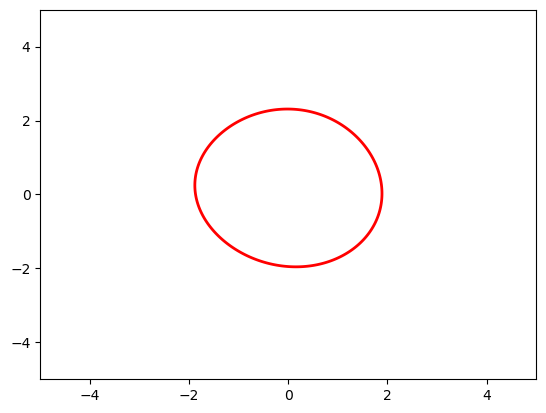

In [22]:
plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='red')

plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.show()

# Dimensionality Reduction with PCA and t-SNE

Dimensionality reduction is a critical step in data preprocessing, especially for high-dimensional datasets. It helps in reducing the number of features, combating the curse of dimensionality, and improving model performance. Two popular techniques for dimensionality reduction are Principal Component Analysis (PCA) and t-Distributed Stochastic Neighbor Embedding (t-SNE).

## Principal Component Analysis (PCA)

PCA is a linear dimensionality reduction technique that transforms the data into a new coordinate system such that the greatest variance by any projection of the data comes to lie on the first coordinate (called the first principal component), the second greatest variance on the second coordinate, and so on.

![pca](../assets/pca.png)

### How PCA Works

1. Standardize the data.
2. Compute the covariance matrix of the data.
3. Calculate the eigenvalues and eigenvectors of the covariance matrix.
4. Sort the eigenvectors by decreasing eigenvalues and choose the first k eigenvectors. This forms a new matrix.
5. Transform the original dataset using this eigenvector matrix to obtain the new k-dimensional feature subspace.

### PCA Formula

PCA involves the eigen decomposition of the data covariance matrix or singular value decomposition of the data matrix, usually after mean centering the data for each attribute.

The covariance matrix of a data matrix $X$ is given by:

$$ S = \frac{1}{n-1} X^T X $$

where $n$ is the number of data points.

The eigen decomposition of $S$ is then computed to obtain the principal components. The eigenvectors of $S$ correspond to the directions of maximum variance, ordered by the corresponding eigenvalues in descending order.

In [24]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification

In [25]:
# Generate synthetic data
# This synthetic dataset has 1000 samples, 100 features, 10 informative features, 10 redundant features, and 2 classes.
X, y = make_classification(n_samples=1000, n_features=100, n_informative=10, n_redundant=10, n_classes=2, random_state=0)

In [28]:
X

array([[ 0.67411889,  2.22582639, -0.01180978, ...,  0.79764212,
         0.07571826, -0.58203799],
       [ 0.90000294,  0.40467489,  0.06826954, ..., -1.63041864,
        -0.41590077,  0.8076828 ],
       [ 0.09298364,  0.30489521, -1.77662279, ..., -2.49684968,
         0.45719277,  1.04868589],
       ...,
       [-1.3115295 , -0.76918325,  1.05431686, ..., -2.57371582,
        -0.56924881, -0.79523866],
       [ 0.89188104, -0.03375338,  0.62388691, ..., -0.60082184,
         0.09423407, -1.68492388],
       [ 1.41706146,  0.3438893 , -0.29154863, ..., -3.42811932,
        -0.52170927, -0.55866584]])

In [26]:
# Assuming X is our dataset with n features
# Standardize the data
X_std = StandardScaler().fit_transform(X)

# Initialize PCA and fit to standardized data (reduced to 2 dimensions)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_std)

In [27]:
X_pca

array([[ 1.01506943,  1.63530967],
       [-2.68987041, -1.07390246],
       [-0.64236029,  3.97316634],
       ...,
       [-2.30016276,  3.47278858],
       [-1.34345508,  2.45640664],
       [-3.10800592, -1.53717772]])

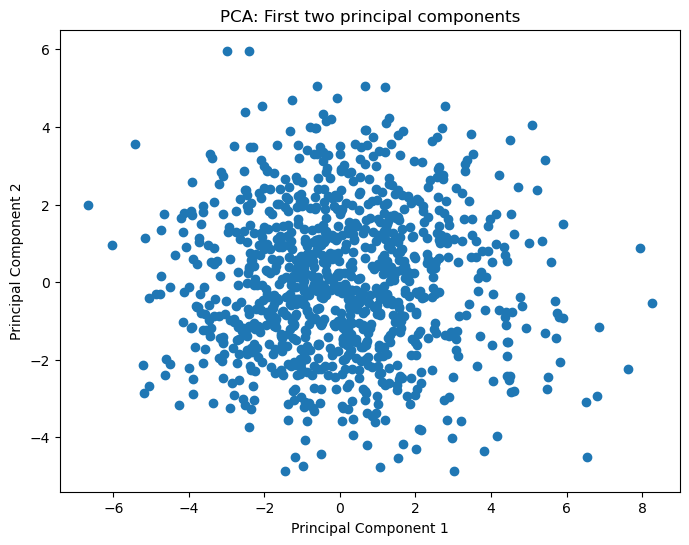

In [30]:
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1])
plt.title('PCA: First two principal components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

## t-Distributed Stochastic Neighbor Embedding (t-SNE)

t-SNE is a non-linear dimensionality reduction technique that is particularly well suited for the visualization of high-dimensional datasets. It converts similarities between data points to joint probabilities and tries to minimize the Kullback-Leibler divergence between the joint probabilities of the low-dimensional embedding and the high-dimensional data.

![tsne](../assets/tsne.png)

### How t-SNE Works

1. Measure the similarity between pairs of instances in the high-dimensional space and in the low-dimensional space.
2. Use these similarities to create a probability distribution that represents similarities between instances.
3. Minimize the divergence between these two distributions with respect to the positions of the points in the map.

### t-SNE Formula

t-SNE first computes probabilities $p_{ij}$ that are proportional to the similarity of objects $i$ and $j$ in the high-dimensional space, using a Gaussian distribution centered at object $i$:

$$ p_{j|i} = \frac{\exp(-||x_i - x_j||^2 / 2\sigma_i^2)}{\sum_{k \neq i} \exp(-||x_i - x_k||^2 / 2\sigma_i^2)} $$

$$ p_{ij} = \frac{p_{j|i} + p_{i|j}}{2n} $$

In the low-dimensional space, t-SNE uses a Student-t distribution to compute similar probabilities $q_{ij}$:

$$ q_{ij} = \frac{(1 + ||y_i - y_j||^2)^{-1}}{\sum_{k \neq l} (1 + ||y_k - y_l||^2)^{-1}} $$

t-SNE then minimizes the Kullback-Leibler divergence between the distributions $P$ and $Q$ to find a good representation of the data in the low-dimensional space:

$$ KL(P||Q) = \sum_i \sum_j p_{ij} \log \frac{p_{ij}}{q_{ij}} $$

In [29]:
from sklearn.manifold import TSNE

In [31]:
# Initialize t-SNE and fit to the original data (reduced to 2 dimensions)
tsne = TSNE(n_components=2, random_state=0)
X_tsne = tsne.fit_transform(X)

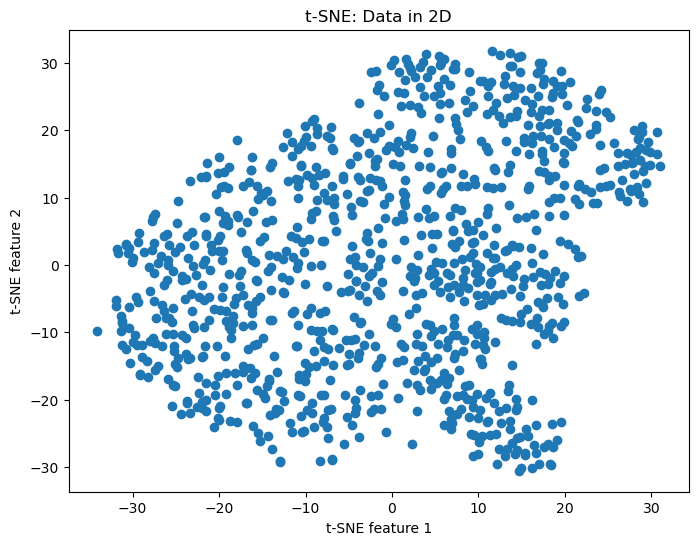

In [32]:
# Visualize t-SNE-reduced data
plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1])
plt.title('t-SNE: Data in 2D')
plt.xlabel('t-SNE feature 1')
plt.ylabel('t-SNE feature 2')
plt.show()

## Dimensionality Reduction on Iris dataset

In [33]:
from sklearn.datasets import load_iris

In [34]:
iris = load_iris()
X = iris.data
y = iris.target

In [35]:
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [36]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_std)

In [37]:
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_std)

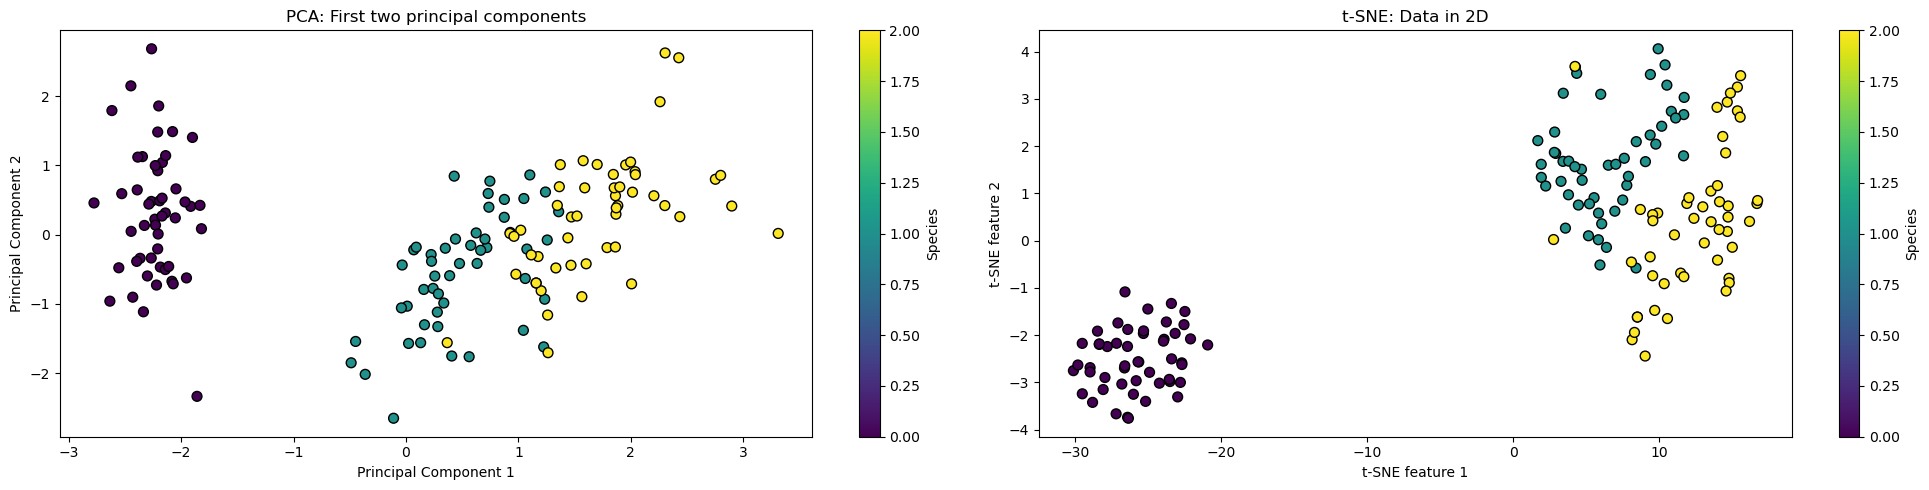

In [41]:
plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolor='k', s=50)
plt.title('PCA: First two principal components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Species')

plt.subplot(1, 2, 2)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='viridis', edgecolor='k', s=50)
plt.title('t-SNE: Data in 2D')
plt.xlabel('t-SNE feature 1')
plt.ylabel('t-SNE feature 2')
plt.colorbar(label='Species')

plt.tight_layout()
plt.show()

# Clustering

Clustering is an unsupervised learning technique used to group similar data points together based on their features. In this tutorial, we will cover three popular clustering algorithms: K-Means, Hierarchical Clustering, and DBSCAN (Density-Based Spatial Clustering of Applications with Noise).

## K-Means Clustering

K-Means is a centroid-based clustering algorithm that partitions the data into K distinct clusters based on distance to the centroid of the clusters.

### How K-Means Works

1. Initialize K centroids randomly.
2. Assign each data point to the closest centroid, forming K clusters.
3. Recalculate the centroids as the mean of all points in the cluster.
4. Repeat steps 2 and 3 until convergence (i.e., assignments no longer change).

The goal of K-Means is to minimize the within-cluster sum of squares (WCSS), which is defined as:

$$ WCSS = \sum_{i=1}^{k} \sum_{x \in C_i} ||x - \mu_i||^2 $$

where $C_i$ is the set of points in cluster $i$ and $\mu_i$ is the centroid of cluster $i$.

![kmeans](../assets/kmeans.png)

### Advantages:

1. **Efficiency**: K-Means is computationally efficient, especially for a large number of data points, making it suitable for big datasets.
2. **Simplicity**: The algorithm is straightforward to understand and implement.
3. **Scalability**: It can easily adapt to new examples and is scalable with the use of algorithms like the mini-batch K-Means.
4. **Well-suited for Spherical Clusters**: K-Means performs well when the clusters are spherical and well-separated.

### Disadvantages:

1. **Number of Clusters**: The number of clusters, K, must be specified beforehand, which can be difficult to estimate without prior knowledge of the data.
2. **Sensitivity to Initial Centroids**: The final clusters can vary based on the initial choice of centroids. The algorithm can converge to local optima.
3. **Sensitivity to Outliers**: Outliers can skew the clusters since K-Means tries to minimize the variance within each cluster.
4. **Assumption of Spherical Clusters**: K-Means assumes that clusters are spherical and equally sized, which might not always be the case.
5. **Difficulty with Different Densities**: It may not perform well when clusters have varying densities.

In [43]:
from sklearn.datasets import make_blobs, make_moons
from sklearn.cluster import KMeans

In [44]:
# Dataset 1: Well-separated clusters
X_blobs, y_blobs = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

# Dataset 2: Non-linearly separable clusters (e.g., two moons)
X_moons, y_moons = make_moons(n_samples=300, noise=0.05, random_state=0)

# Dataset 3: Different variance
X_varied, y_varied = make_blobs(n_samples=300, centers=3, cluster_std=[0.5, 1.0, 0.5], random_state=0)

In [45]:
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(X_blobs)
labels_blobs = kmeans.labels_

/Users/zanelim/miniconda3/envs/ml/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [46]:
labels_blobs

array([1, 2, 0, 2, 1, 1, 3, 0, 2, 2, 3, 2, 0, 2, 1, 0, 0, 1, 3, 3, 1, 1,
       0, 3, 3, 0, 1, 0, 3, 0, 2, 2, 0, 2, 2, 2, 2, 2, 3, 1, 0, 3, 0, 0,
       3, 3, 2, 3, 2, 1, 3, 1, 2, 1, 1, 3, 2, 3, 2, 1, 2, 0, 2, 3, 3, 3,
       2, 1, 2, 3, 0, 3, 2, 3, 3, 2, 3, 0, 1, 2, 1, 0, 1, 1, 2, 0, 1, 0,
       2, 2, 0, 1, 2, 3, 3, 0, 1, 1, 0, 3, 2, 1, 2, 1, 0, 1, 1, 0, 2, 0,
       3, 3, 1, 2, 1, 0, 2, 1, 1, 0, 3, 1, 3, 1, 1, 1, 1, 3, 1, 3, 2, 3,
       3, 1, 2, 3, 3, 2, 0, 2, 2, 3, 0, 3, 0, 3, 2, 0, 2, 2, 2, 0, 2, 0,
       1, 3, 2, 3, 1, 0, 2, 0, 0, 1, 0, 3, 3, 0, 1, 0, 0, 2, 1, 0, 3, 2,
       1, 1, 0, 3, 1, 0, 3, 3, 0, 0, 0, 0, 1, 2, 0, 3, 0, 0, 3, 3, 3, 0,
       3, 2, 0, 3, 1, 3, 0, 2, 3, 2, 0, 2, 0, 3, 0, 0, 2, 3, 3, 1, 1, 0,
       2, 1, 1, 3, 1, 3, 0, 2, 2, 0, 0, 2, 0, 1, 3, 0, 1, 3, 2, 3, 1, 0,
       1, 2, 2, 2, 2, 3, 3, 2, 0, 3, 1, 0, 3, 3, 3, 1, 1, 2, 0, 0, 3, 1,
       2, 3, 0, 2, 0, 1, 1, 3, 3, 0, 1, 1, 1, 0, 2, 2, 1, 1, 0, 1, 1, 1,
       2, 3, 2, 0, 1, 1, 2, 2, 2, 1, 1, 0, 2, 3], d

## Hierarchical Clustering

Hierarchical clustering is a method of cluster analysis that seeks to build a hierarchy of clusters. The process can be approached in two ways: Agglomerative (bottom-up) and Divisive (top-down). Here, we'll focus on the more commonly used agglomerative approach.

### Steps for Agglomerative Hierarchical Clustering:

1. **Start by Assigning Each Data Point to Its Own Cluster**:
   - If you have `N` data points, you start with `N` clusters, each containing just one data point.

2. **Compute the Proximity Matrix**:
   - Calculate the distance between each pair of clusters. There are various distance metrics that can be used, such as Euclidean, Manhattan, or Cosine distance. The choice of distance metric depends on the nature of the data.

3. **Merge the Closest Pair of Clusters**:
   - Find the two clusters that are closest to each other and combine them into a single cluster. As a result, the number of clusters decreases by one.

4. **Update the Proximity Matrix**:
   - After merging two clusters, the proximity matrix needs to be updated to reflect the distances between the new cluster and the original clusters. The method for updating the matrix depends on the linkage criterion:
     - **Single Linkage (MIN)**: Distance between two clusters is the minimum distance between any single data point in the first cluster and any single data point in the second cluster.
     
       $$ d(A,B) = \min_{a \in A, b \in B} d(a, b) $$
       
     - **Complete Linkage (MAX)**: Distance between two clusters is the maximum distance between any single data point in the first cluster and any single data point in the second cluster.
     
       $$ d(A,B) = \max_{a \in A, b \in B} d(a, b) $$
       
     - **Average Linkage**: Distance between two clusters is the average distance between each data point in the first cluster and every data point in the second cluster.
     
       $$ d(A,B) = \frac{1}{|A| \cdot |B|} \sum_{a \in A} \sum_{b \in B} d(a, b) $$
       
     - **Ward's Method**: Distance between two clusters is the increase in the total within-cluster variance after merging them, which is equivalent to the squared Euclidean distance between cluster means.
     
       $$ d(A,B) = \sum_{i=1}^{n} (x_{iA} - x_{iB})^2 $$
       
     where $x_{iA}$ and $x_{iB}$ are the means of clusters $A$ and $B$ for variable $i$, and $n$ is the number of variables.

5. **Repeat Steps 3 and 4**:
   - Continue merging the closest pair of clusters and updating the proximity matrix until all data points are clustered into a single cluster that contains all observations.

6. **Construct a Dendrogram**:
   - A dendrogram is a tree-like diagram that records the sequences of merges or splits. It provides a visual summary of the clustering process, showing the order of cluster combinations and the distance at which each merge occurred.

Hierarchical clustering doesn't require specifying the number of clusters beforehand, but it can be determined by cutting the dendrogram at a desired level. The choice of where to cut the dendrogram depends on the problem context or a predetermined threshold distance.

![hierarchical](../assets/hierarchical.png)

### Advantages:

1. **No Need to Specify Number of Clusters**: You do not need to specify the number of clusters beforehand. The number of clusters can be determined by cutting the dendrogram at the desired level.
2. **Dendrogram**: Provides a visual representation of the clustering process, which can be informative.
3. **Flexibility**: Can create clusters of various shapes and sizes, not limited to spherical clusters like K-Means.
4. **Easy to Merge/Split Clusters**: The hierarchical nature allows for easy merging or splitting of clusters based on the hierarchy.

### Disadvantages:

1. **Computational Complexity**: The time complexity for the standard algorithm is typically O(n^2 log n) or O(n^3), which can be prohibitive for large datasets.
2. **Irreversible**: Once a decision is made to combine two clusters, it cannot be undone without restarting the entire process.
3. **Sensitivity to Noise and Outliers**: Similar to K-Means, hierarchical clustering can be sensitive to noise and outliers, which can lead to misinterpretations of the data structure.
4. **Choice of Linkage Criteria**: The results can be significantly different based on the choice of linkage criteria (single, complete, average, etc.), and there is no objective way to choose the best method.

In [47]:
from sklearn.cluster import AgglomerativeClustering

In [48]:
hierarchical = AgglomerativeClustering(n_clusters=3)
labels_varied = hierarchical.fit_predict(X_varied)

In [49]:
labels_varied

array([2, 0, 2, 1, 1, 1, 1, 2, 1, 1, 0, 0, 0, 2, 0, 1, 2, 2, 1, 0, 1, 2,
       0, 2, 1, 1, 2, 1, 0, 0, 1, 2, 2, 0, 0, 1, 0, 1, 2, 0, 1, 0, 2, 0,
       0, 1, 0, 1, 1, 0, 1, 2, 1, 1, 0, 2, 2, 1, 1, 2, 0, 0, 2, 1, 0, 1,
       2, 0, 2, 0, 1, 1, 1, 1, 0, 2, 0, 1, 2, 2, 1, 2, 0, 2, 2, 2, 0, 1,
       2, 2, 1, 0, 1, 2, 0, 0, 2, 0, 1, 2, 0, 1, 2, 0, 2, 2, 1, 2, 0, 0,
       2, 1, 2, 2, 1, 1, 2, 2, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       2, 1, 1, 0, 1, 2, 1, 1, 0, 2, 0, 2, 1, 1, 2, 1, 1, 0, 2, 1, 2, 0,
       1, 1, 0, 0, 2, 0, 2, 2, 0, 2, 1, 2, 2, 2, 2, 1, 0, 2, 1, 0, 0, 0,
       2, 0, 2, 2, 0, 1, 2, 2, 2, 2, 0, 1, 2, 1, 2, 2, 0, 0, 1, 2, 0, 1,
       2, 1, 0, 1, 2, 1, 0, 1, 2, 1, 2, 0, 2, 2, 1, 0, 0, 0, 0, 2, 1, 0,
       2, 1, 0, 0, 2, 1, 1, 2, 2, 1, 2, 0, 0, 2, 0, 1, 1, 1, 2, 2, 0, 1,
       1, 1, 1, 0, 1, 1, 2, 0, 0, 2, 0, 0, 1, 2, 0, 1, 2, 2, 1, 2, 1, 1,
       2, 1, 2, 0, 0, 0, 0, 2, 2, 2, 2, 2, 1, 1, 0, 2, 2, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 2, 2, 1, 0, 2, 1])

## DBSCAN

DBSCAN (Density-Based Spatial Clustering of Applications with Noise) is a popular clustering algorithm that groups together points that are closely packed together while marking points that lie alone in low-density regions as outliers. 

### Steps for DBSCAN Clustering:

![dbscan1](../assets/dbscan1.png)

1. **Choose Parameters**:
   - Select values for two parameters: `eps` (epsilon) and `MinPts` (minimum points).
     - `eps`: The radius of the neighborhood around a point.
     - `MinPts`: The minimum number of points required to form a dense region, i.e., for a point to be considered a core point.

2. **Identify Core Points, Border Points, and Noise**:
   - For each point in the dataset, count how many points fall within the `eps` neighborhood (including the point itself).
   - A point is labeled as a core point if at least `MinPts` points fall within its `eps` neighborhood.
   - A point is labeled as a border point if fewer than `MinPts` points fall within its `eps` neighborhood, but it is in the neighborhood of a core point.
   - A point is labeled as noise if it is neither a core point nor a border point.

3. **Form Clusters**:
   - For each core point, if it is not already assigned to a cluster, create a new cluster, and recursively add all points that are directly reachable from it in the `eps` neighborhood to the cluster.
   - Merge clusters if a core point is reachable from points in different clusters.

4. **Assign Border Points**:
   - Assign each border point to one of the clusters of its associated core points.

5. **Handle Noise**:
   - Points classified as noise are not assigned to any cluster. They can either be discarded or processed separately, depending on the context of the analysis.

### Advantages:

- Does not require specifying the number of clusters beforehand.
- Can find arbitrarily shaped clusters.
- Robust to outliers.
- Has a notion of noise.

### Disadvantages:

- Can struggle with clusters of varying densities.
- The quality of clustering depends heavily on the choice of parameters `eps` and `MinPts`.
- If the data and dimensionality are very high, it may be computationally expensive to compute all the neighborhoods.

![dbscan2](../assets/dbscan2.jpeg)

In [51]:
from sklearn.cluster import DBSCAN

In [52]:
dbscan = DBSCAN(eps=0.2)
labels_moons = dbscan.fit_predict(X_moons)

In [53]:
labels_varied

array([2, 0, 2, 1, 1, 1, 1, 2, 1, 1, 0, 0, 0, 2, 0, 1, 2, 2, 1, 0, 1, 2,
       0, 2, 1, 1, 2, 1, 0, 0, 1, 2, 2, 0, 0, 1, 0, 1, 2, 0, 1, 0, 2, 0,
       0, 1, 0, 1, 1, 0, 1, 2, 1, 1, 0, 2, 2, 1, 1, 2, 0, 0, 2, 1, 0, 1,
       2, 0, 2, 0, 1, 1, 1, 1, 0, 2, 0, 1, 2, 2, 1, 2, 0, 2, 2, 2, 0, 1,
       2, 2, 1, 0, 1, 2, 0, 0, 2, 0, 1, 2, 0, 1, 2, 0, 2, 2, 1, 2, 0, 0,
       2, 1, 2, 2, 1, 1, 2, 2, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       2, 1, 1, 0, 1, 2, 1, 1, 0, 2, 0, 2, 1, 1, 2, 1, 1, 0, 2, 1, 2, 0,
       1, 1, 0, 0, 2, 0, 2, 2, 0, 2, 1, 2, 2, 2, 2, 1, 0, 2, 1, 0, 0, 0,
       2, 0, 2, 2, 0, 1, 2, 2, 2, 2, 0, 1, 2, 1, 2, 2, 0, 0, 1, 2, 0, 1,
       2, 1, 0, 1, 2, 1, 0, 1, 2, 1, 2, 0, 2, 2, 1, 0, 0, 0, 0, 2, 1, 0,
       2, 1, 0, 0, 2, 1, 1, 2, 2, 1, 2, 0, 0, 2, 0, 1, 1, 1, 2, 2, 0, 1,
       1, 1, 1, 0, 1, 1, 2, 0, 0, 2, 0, 0, 1, 2, 0, 1, 2, 2, 1, 2, 1, 1,
       2, 1, 2, 0, 0, 0, 0, 2, 2, 2, 2, 2, 1, 1, 0, 2, 2, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 2, 2, 1, 0, 2, 1])

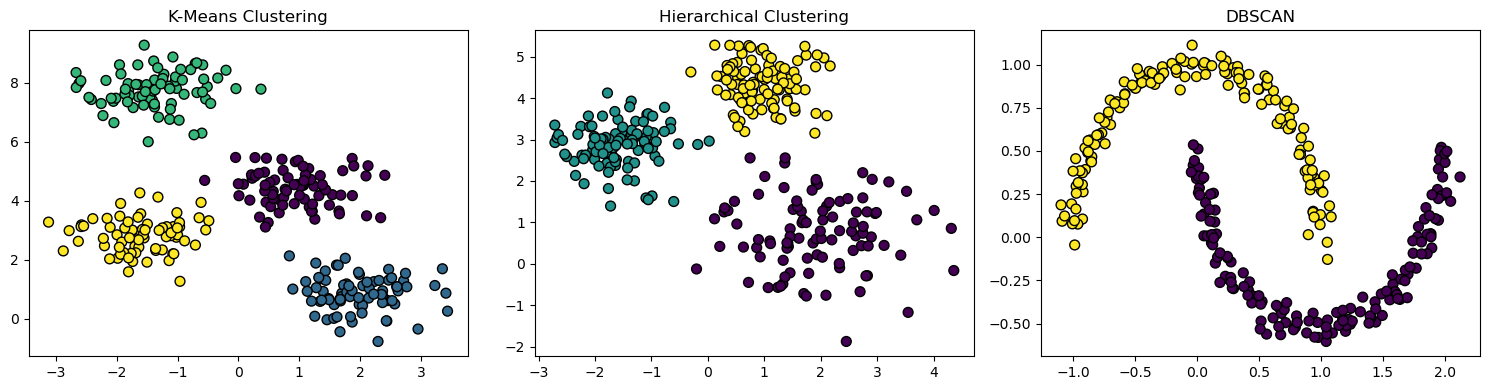

In [54]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# K-Means Clustering
axes[0].scatter(X_blobs[:, 0], X_blobs[:, 1], c=labels_blobs, cmap='viridis', edgecolor='k', s=50)
axes[0].set_title('K-Means Clustering')

# Hierarchical Clustering
axes[1].scatter(X_varied[:, 0], X_varied[:, 1], c=labels_varied, cmap='viridis', edgecolor='k', s=50)
axes[1].set_title('Hierarchical Clustering')

# DBSCAN
axes[2].scatter(X_moons[:, 0], X_moons[:, 1], c=labels_moons, cmap='viridis', edgecolor='k', s=50)
axes[2].set_title('DBSCAN')

plt.tight_layout()
plt.show()